In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from collections import Counter

In [2]:
data_txt_path = "/Users/saberatalukder/Documents/Classes/Winter19-20/CS155/CS155_PROJECT2/data/data.txt"
movies_txt_path = "/Users/saberatalukder/Documents/Classes/Winter19-20/CS155/CS155_PROJECT2/data/movies.txt"

# Part 1

In [3]:
#Get all of the ratings from the data
all_ratings = []
data_file = open(data_txt_path,"r") 

for data_row in data_file:
    all_ratings.append(int(float(data_row.split()[-1])))


In [4]:
all_ratings = np.asarray(all_ratings)

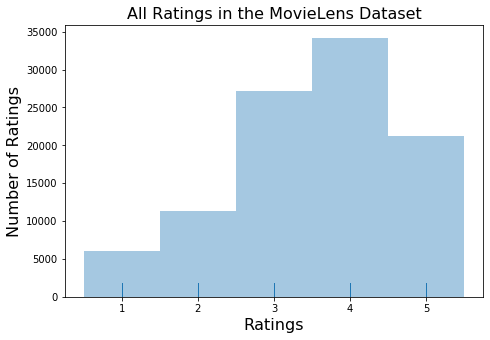

In [5]:
f, axs = plt.subplots(1,1,figsize=(7.5,5))
_ = sns.distplot(all_ratings, kde=False, bins=np.arange(0.5,6.5), rug=True)
_ = plt.xticks([1,2,3,4,5])
_ = plt.title('All Ratings in the MovieLens Dataset', fontsize=16)
_ = plt.xlabel('Ratings', fontsize=16)
_ = plt.ylabel('Number of Ratings', fontsize=16)

# Create a Dictionary

In [6]:
movie_ids_and_all_ratings = {}
data_file = open(data_txt_path,"r") 

for data_row in data_file:
    movie_id = (int(float(data_row.split()[1])))
    rating = (int(float(data_row.split()[-1])))
    
    if movie_id in movie_ids_and_all_ratings:
        movie_ids_and_all_ratings[movie_id].append(rating) 
    else:
        movie_ids_and_all_ratings[movie_id] = [rating]

In [7]:
movie_ids_and_num_ratings = {}
movie_ids_and_avg_ratings = {}
for key, value in movie_ids_and_all_ratings.items():
    # populating the num ratings dictionary
    movie_ids_and_num_ratings[key] = [len(value)]
    
    # populating the avg ratings dictionary
    movie_ids_and_avg_ratings[key] = [np.mean(value)]

# Part 2

In [8]:
all_ratings_top_num_ratings = []
sorted_movie_ids_and_num_ratings = Counter(movie_ids_and_num_ratings)

for movie_id, num_ratings in sorted_movie_ids_and_num_ratings.most_common(10):
    all_ratings_top_num_ratings = all_ratings_top_num_ratings + movie_ids_and_all_ratings[movie_id]

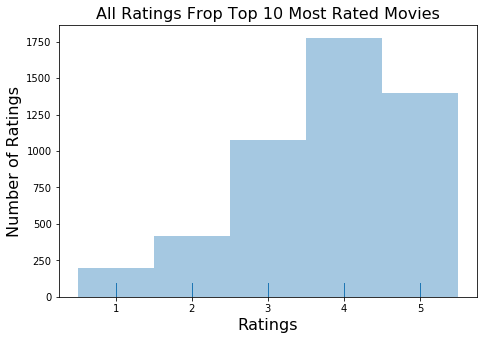

In [9]:
f, axs = plt.subplots(1,1,figsize=(7.5,5))
_ = sns.distplot(all_ratings_top_num_ratings, kde=False, bins=np.arange(0.5,6.5), rug=True)
_ = plt.xticks([1,2,3,4,5])
_ = plt.title('All Ratings Frop Top 10 Most Rated Movies', fontsize=16)
_ = plt.xlabel('Ratings', fontsize=16)
_ = plt.ylabel('Number of Ratings', fontsize=16)

# Part 3

In [10]:
list_top_rated_movie_ids = [1189, 1500, 814, 1536, 1293, 1599, 1653, 1467, 1122, 1201]

In [11]:
all_ratings_top_rated = []
sorted_movie_ids_and_avg_ratings = Counter(movie_ids_and_avg_ratings)

for movie_id, avg_rating in sorted_movie_ids_and_avg_ratings.most_common(10):
    all_ratings_top_rated = all_ratings_top_rated + movie_ids_and_all_ratings[movie_id]

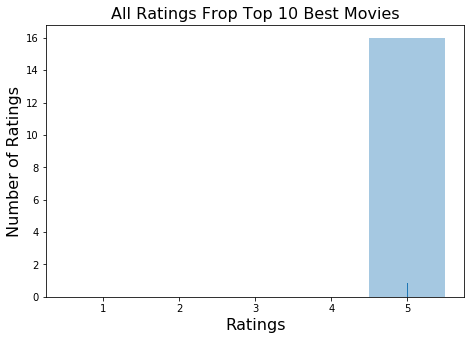

In [12]:
f, axs = plt.subplots(1,1,figsize=(7.5,5))
_ = sns.distplot(all_ratings_top_rated, kde=False, bins=np.arange(0.5,6.5), rug=True)
_ = plt.xticks([1,2,3,4,5])
_ = plt.title('All Ratings Frop Top 10 Best Movies', fontsize=16)
_ = plt.xlabel('Ratings', fontsize=16)
_ = plt.ylabel('Number of Ratings', fontsize=16)

# Part 4

In [65]:
movie_idx_for_animation = []
movie_idx_for_documentary = []
movie_idx_for_sci_fi = []

idx_for_anim = 5
idx_for_doc = 9
idx_for_sci_fi = 17

movie_file = open(movies_txt_path,"r") 

for movie_row in movie_file:
    split_row = movie_row.split('\t')
    if int(split_row[idx_for_anim]) == 1:
        movie_idx_for_animation.append(int(split_row[0]))
        
    if int(split_row[idx_for_doc]) == 1:
        movie_idx_for_documentary.append(int(split_row[0]))
        
    if int(split_row[idx_for_sci_fi]) == 1:
        movie_idx_for_sci_fi.append(int(split_row[0]))

In [66]:
_ = np.asarray(movie_idx_for_animation)
_ = np.asarray(movie_idx_for_documentary)
_ = np.asarray(movie_idx_for_sci_fi)

In [67]:
all_ratings_animation = []
all_ratings_documentary = []
all_ratings_sci_fi = []

for anim in movie_idx_for_animation:
    all_ratings_animation = all_ratings_animation + movie_ids_and_all_ratings[anim]
    
for doc in movie_idx_for_documentary:
    all_ratings_documentary = all_ratings_documentary + movie_ids_and_all_ratings[doc]
    
for scifi in movie_idx_for_sci_fi:
    all_ratings_sci_fi = all_ratings_sci_fi + movie_ids_and_all_ratings[scifi]

## Plots for the Ratings with the same y scale

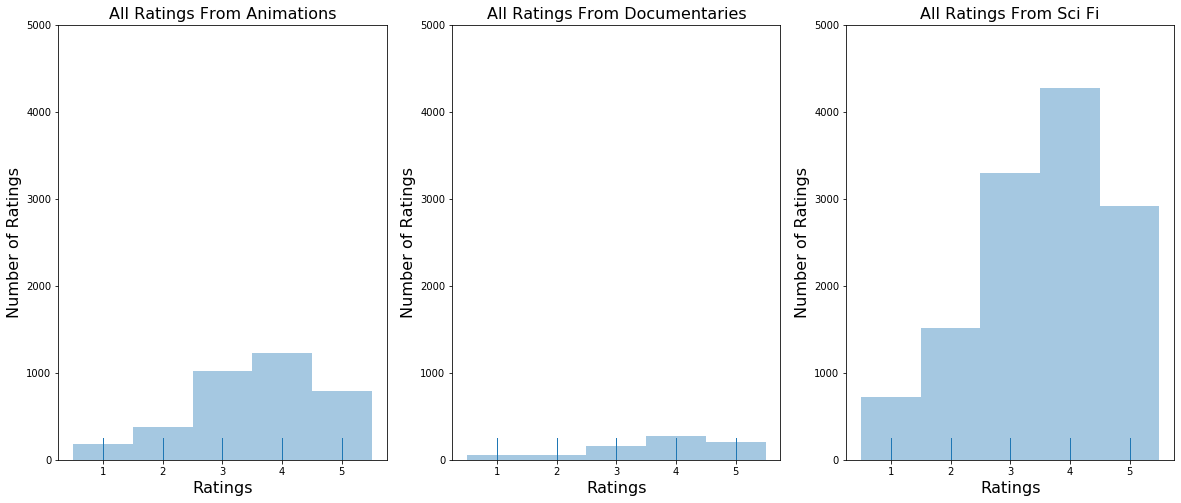

In [68]:
f, axs = plt.subplots(1,3,figsize=(20,8))

plt.subplot(1,3,1)
_ = sns.distplot(all_ratings_animation, kde=False, bins=np.arange(0.5,6.5), rug=True)
_ = plt.yticks([0,1000,2000,3000,4000, 5000])
_ = plt.xticks([1,2,3,4,5])
_ = plt.title('All Ratings From Animations', fontsize=16)
_ = plt.xlabel('Ratings', fontsize=16)
_ = plt.ylabel('Number of Ratings', fontsize=16)

plt.subplot(1,3,2)
_ = sns.distplot(all_ratings_documentary, kde=False, bins=np.arange(0.5,6.5), rug=True)
_ = plt.yticks([0,1000,2000,3000,4000, 5000])
_ = plt.xticks([1,2,3,4,5])
_ = plt.title('All Ratings From Documentaries', fontsize=16)
_ = plt.xlabel('Ratings', fontsize=16)
_ = plt.ylabel('Number of Ratings', fontsize=16)

plt.subplot(1,3,3)
_ = sns.distplot(all_ratings_sci_fi, kde=False, bins=np.arange(0.5,6.5), rug=True)
_ = plt.yticks([0,1000,2000,3000,4000, 5000])
_ = plt.xticks([1,2,3,4,5])
_ = plt.title('All Ratings From Sci Fi', fontsize=16)
_ = plt.xlabel('Ratings', fontsize=16)
_ = plt.ylabel('Number of Ratings', fontsize=16)

## Plots for the Ratings with the different y scale

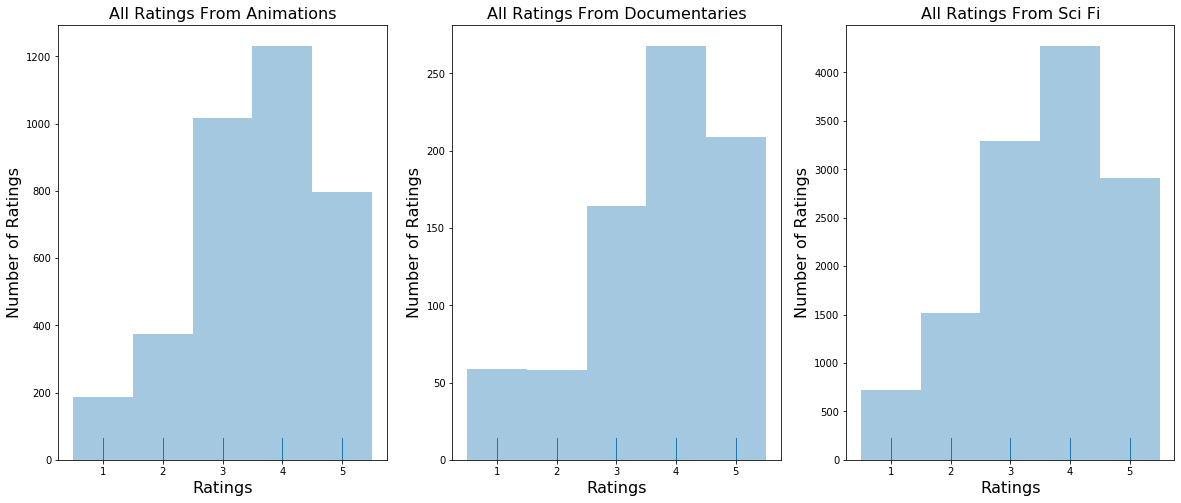

In [69]:
f, axs = plt.subplots(1,3,figsize=(20,8))

plt.subplot(1,3,1)
_ = sns.distplot(all_ratings_animation, kde=False, bins=np.arange(0.5,6.5), rug=True)
_ = plt.xticks([1,2,3,4,5])
_ = plt.title('All Ratings From Animations', fontsize=16)
_ = plt.xlabel('Ratings', fontsize=16)
_ = plt.ylabel('Number of Ratings', fontsize=16)

plt.subplot(1,3,2)
_ = sns.distplot(all_ratings_documentary, kde=False, bins=np.arange(0.5,6.5), rug=True)
_ = plt.xticks([1,2,3,4,5])
_ = plt.title('All Ratings From Documentaries', fontsize=16)
_ = plt.xlabel('Ratings', fontsize=16)
_ = plt.ylabel('Number of Ratings', fontsize=16)

plt.subplot(1,3,3)
_ = sns.distplot(all_ratings_sci_fi, kde=False, bins=np.arange(0.5,6.5), rug=True)
_ = plt.xticks([1,2,3,4,5])
_ = plt.title('All Ratings From Sci Fi', fontsize=16)
_ = plt.xlabel('Ratings', fontsize=16)
_ = plt.ylabel('Number of Ratings', fontsize=16)